In [ ]:
import os
import sys
import requests

sys.path.append(os.pardir)
import rsmine.coarsegrainer.build_dataset as ds
import rsmine.coarsegrainer.cg_optimisers as cg_opt
import rsmine.coarsegrainer.plotter as plotter

2023-10-17 16:27:57.890759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/konrad/code/rsmi/RSMI-NE/examples/../rsmine/coarsegrainer/build_dataset.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# RSMI optimisation for the dimer model

## Download sample dataset

In [ ]:
url = 'https://polybox.ethz.ch/index.php/s/bUp9a5qZWuLGXMb/download'
filename = 'configs_intdimer2d_square_L64_T15.000.npy'
data_dir = os.path.join(os.pardir, 'data')

if os.path.isfile(os.path.join(data_dir, filename)):
    print('Existing dataset found.')
else:
    print('No existing dataset found.')
    if not os.path.isdir(data_dir):
        os.mkdir(data_dir)
        print('Created the data directory.')
    print('Downloading data...')
    r = requests.get(url, allow_redirects=True)
    open(os.path.join(data_dir, filename), 'wb').write(r.content)
    print('Data downloaded into /coarsegrainer/data/.')

Existing dataset found.


## Enter system parameters

In [ ]:
data_params = {
    'model': 'intdimer2d',
    'lattice_type': 'square',
    'L': 64,
    'T': 15.000,
    'N_samples': 28800, 
    'dimension': 2,
}

generator=ds.dataset(**data_params)

print(data_params)

Existing data found.
 Loading the data...
Loading complete.
{'model': 'intdimer2d', 'lattice_type': 'square', 'L': 64, 'T': 15.0, 'N_samples': 28800, 'dimension': 2}


## Enter optimisation parameters

In [ ]:
CG_params = {'init_temperature': 0.75,
    'min_temperature': 0.1,
    'relaxation_rate': 0.0001, 
    'Nq': None,
    'conv_activation': None,
    'hidden_dim': 2,
    'h_embed': True,
    'use_probs': False,
    'use_logits': True,
    'nonlinearCG': None,
}
ll = CG_params['ll'] = (8,8)

critic_params = {
    'layers': 3, 
    'embed_dim': 8, 
    'hidden_dim': 32, 
    'activation': 'relu',
    'use_dropout': True,
    'dropout_rate': 0.2,
}

opt_params = {
    "batch_size": 500, 
    "iterations": 100, 
    "shuffle": 100000,
    "learning_rate": 9e-3 
}

index = (10, 10) # index of the visible patch to be coarse-grained
buffer_size = 4
env_size = 4

V, E = generator.rsmi_data(index, ll, buffer_size=buffer_size, cap=ll[0]+2*(buffer_size+env_size))

Preparing the RSMI dataset...
RSMI dataset prepared.


## Perform the optimisation and plot results

In [ ]:
estimates, _, filters, _ = cg_opt.train_RSMI_optimiser(CG_params, critic_params, opt_params, data_params, 
                                                       E=E, V=V, use_GPU=True)

  0%|          | 0/5800 [00:00<?, ?it/s]2023-10-17 16:28:10.038354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [28800,320]
	 [[{{node Placeholder/_1}}]]
2023-10-17 16:28:10.038614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [28800,320]
	 [[{{node Placeholder/_1}}]]


Len dat:  5800


Gumbel-softmax temperature 0.42, I=0.18: 100%|██████████| 5800/5800 [00:33<00:00, 172.58it/s]

Training complete.


RSMI estimate is  0.2010276855453795


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
/home/konrad/code/rsmi/RSMI-NE/examples/../rsmine/coarsegrainer/plotter.py:274: UserWarning: Tight layout not applied. tight_layout cannot make axes 

{'init_temperature': 0.75, 'min_temperature': 0.1, 'relaxation_rate': 0.0001, 'Nq': None, 'conv_activation': None, 'hidden_dim': 2, 'h_embed': True, 'use_probs': False, 'use_logits': True, 'nonlinearCG': None, 'll': (8, 8)}
{'layers': 3, 'embed_dim': 8, 'hidden_dim': 32, 'activation': 'relu', 'use_dropout': True, 'dropout_rate': 0.2}
{'batch_size': 500, 'iterations': 100, 'shuffle': 100000, 'learning_rate': 0.009}


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

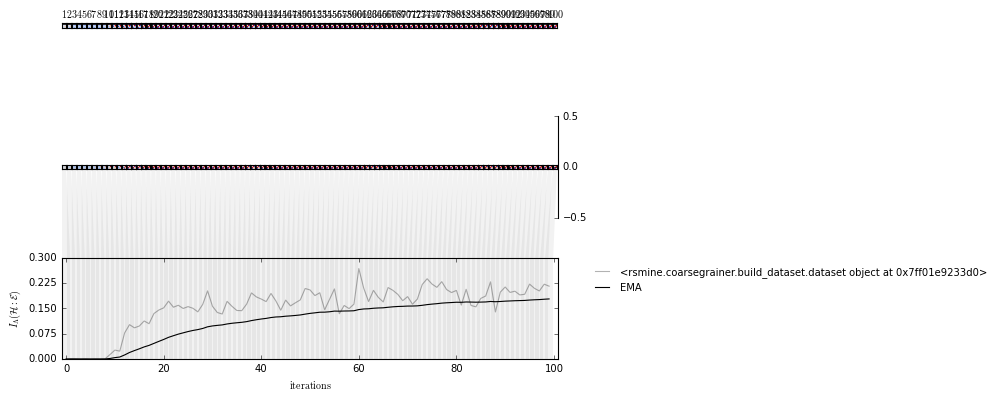

In [ ]:
print('RSMI estimate is ', cg_opt.RSMI_estimate(estimates, ema_span=20))

"""
plotter.plot_fancy_rsmimax(estimates, filters, opt_params, CG_params, 
                            generator, mi_bound=r'$\rm InfoNCE$', 
                            filter_lim=2.3, EMA_span=20, save=False, 
                            series_skip=opt_params['iterations']//4-1, 
                            interpolation='hanning', cmap='RdBu')
"""

plotter.plot_fancy_rsmimax(estimates, filters, opt_params, CG_params, 
                            generator)

print(CG_params)
print(critic_params)
print(opt_params)